In [ ]:
from utils.dataloader import DatasetLoader 
from utils.plot import plt_corr,plot_index

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_path = "dataset/"
loader = DatasetLoader(dataset_path)

datasets = loader.load_all_pickle_dataset()
dataset_dict = loader.get_state_names(datasets[0])
print(dataset_dict)

blacklist_states = ['kansas', 'new mexico', 'california', 'arizona']

for idx in range(len(blacklist_states)):
    del dataset_dict[blacklist_states[idx]]

In [5]:
full_df = loader.combine_datasets(datasets,dataset_dict,total_dataset_number=5)

In [ ]:
full_df_parallel = loader.combine_datasets_parallel(datasets,dataset_dict,total_dataset_number=5)

In [ ]:
import multiprocessing
print(multiprocessing.cpu_count())

In [ ]:
full_df.head(50)

In [ ]:
#temporal mean
mean_df = pd.DataFrame(columns=list(full_df.columns)[1:])



for i in range(0, len(full_df), 6):
    alt_df = full_df.iloc[i:i+6].copy()
    mean = alt_df.mean()
    for col in full_df.columns[1:]:
        mean_df[col].append(pd.Series(mean[col],
    mean_df = mean_df.append(pd.Series([df.iloc[i]['Date']] + row, index=mean_df.columns), ignore_index=True)


# for i in range(0, len(df), 6):
#     alt_df = df.iloc[i:i+6].copy()
#     ortalama_değerler = alt_df.mean()
#     for sütun in sütunlar:
#             yeni_sütun_adı = sütun + '_Ortalama'
#             yeni_satır[yeni_sütun_adı] = ortalama_değerler[sütun]
#     yeni_df = yeni_df.append(yeni_satır, ignore_index=True)

In [ ]:
mean_df

In [ ]:
#full_df['evi'].values[6:6+6].reshape(1, -1)

In [6]:
full_df['Date'] = pd.to_datetime(full_df['Date'], format = '%m-%d')


In [ ]:
full_df.dtypes

In [ ]:
dynamic_cols

In [7]:
cols = list(full_df.columns)
dynamic_cols = cols[1:14]
new_dynamic_cols = [f"{dyn}_{m}" for dyn in dynamic_cols for m in range(4, 10)]

new_df = pd.DataFrame(columns=new_dynamic_cols)

# Veri döngüsü
for i in range(0, len(full_df), 6):
    row = full_df.iloc[i:i+6,1:14].values.ravel()
    new_df = new_df.append(pd.Series(row, index=new_df.columns), ignore_index=True)

for i in range(13,len(cols)):
    new_df[cols[i]] = full_df[cols[i]]



In [9]:
full_df

,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,1900-04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,1900-05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,1900-06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,1900-07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,1900-08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,1900-05-15,0.147366,3.009667,16.458302,15785.532374,14406.485629,49448.332171,0.000000,511.273044,32.359206,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6596,1900-06-15,0.138030,2.773413,15.413657,15917.574843,14614.328619,51060.650087,0.759882,497.074180,33.964788,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6597,1900-07-15,0.158512,3.184097,17.261705,16086.444367,14851.301994,50300.061961,0.000000,507.819244,39.806442,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0
6598,1900-08-15,0.155171,4.577355,24.006862,15970.488128,14730.365684,47515.327461,0.441983,474.409474,36.650876,...,145.947609,185.418075,109.261333,77.933179,556.218997,56.119027,33.153465,92.948824,21.344069,410.0


In [82]:
cols = list(full_df.columns)
dynamic_cols = cols[1:14]
new_dynamic_cols = [f"{dyn}_{m}" for dyn in dynamic_cols for m in range(4, 10)]

mean_df = pd.DataFrame(columns=cols[1:])

# Veri döngüsü
for i in range(0, len(full_df), 6):
    mean_ = []
    for j in range(1, len(cols)):
        values = full_df.iloc[i:i+6, j].values
        mean_.append(values.mean())
    mean_df = mean_df.append(pd.Series(mean_, index=cols[1:]), ignore_index=True)
#for i in range(13,len(cols)):
    #mean_df[cols[i]] = full_df[cols[i]]



In [83]:
mean_df

,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,tmin,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,0.344663,15.200855,50.758881,15084.620151,14607.021090,47602.153448,5.803641,367.977717,30.295502,20.418101,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,0.392913,21.772806,59.835428,15058.382752,14604.918976,48195.141510,2.303123,401.970012,30.041473,17.615150,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
2,0.375524,17.379914,56.179904,15018.553591,14652.624353,48264.095885,2.111686,397.700982,30.121420,17.801071,...,410.812365,293.561398,109.764601,52.214165,1067.024366,117.940081,38.610076,150.685079,41.877138,964.0
3,0.383917,15.487743,52.527555,15109.090043,14561.656829,47738.877896,4.313393,382.327416,31.093999,19.026908,...,130.701087,205.027886,59.933976,54.598065,859.944129,103.266948,21.015287,140.017393,37.409538,800.0
4,0.382282,20.330832,56.534476,15016.993018,14563.336256,47729.713099,3.179764,392.646221,31.107012,18.905130,...,159.153368,195.856186,77.696829,51.155335,969.720436,99.784046,16.696927,130.917712,36.361849,857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.375906,11.275903,45.983749,15296.158982,14659.510277,47355.404711,2.632270,426.588627,32.025373,20.353463,...,392.798638,427.334271,267.768370,68.298912,1214.751463,152.393196,3.542135,184.377850,53.363718,1007.0
1096,0.244080,8.109394,35.925727,15445.633059,14606.764880,48263.175621,2.326919,413.952736,31.534673,16.677386,...,400.648040,303.618716,177.292773,74.770346,1014.992316,73.680604,30.698133,131.214816,38.662082,483.0
1097,0.280602,7.516867,33.825612,15417.882285,14751.322716,46887.014098,2.387194,412.129591,32.803947,22.287848,...,179.360253,270.159167,176.403242,76.559601,1005.625344,92.671008,5.454114,132.518912,30.728612,701.0
1098,0.298610,9.976785,41.060023,15436.865951,14666.499999,47600.886405,1.546145,435.632986,32.360090,19.102098,...,464.448651,404.629042,373.127370,76.310138,1036.009102,109.931562,28.895865,166.142748,44.004660,588.0


In [75]:
mean_df.head(-20)

,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,tmin,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,0.344663,15.200855,50.758881,15084.620151,14607.021090,47602.153448,5.803641,367.977717,30.295502,20.418101,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,0.392913,21.772806,59.835428,15058.382752,14604.918976,48195.141510,2.303123,401.970012,30.041473,17.615150,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,0.375524,17.379914,56.179904,15018.553591,14652.624353,48264.095885,2.111686,397.700982,30.121420,17.801071,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,0.383917,15.487743,52.527555,15109.090043,14561.656829,47738.877896,4.313393,382.327416,31.093999,19.026908,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,0.382282,20.330832,56.534476,15016.993018,14563.336256,47729.713099,3.179764,392.646221,31.107012,18.905130,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.219306,6.627791,30.654982,15577.320888,14665.618134,47724.548952,0.558000,454.841669,32.171979,17.607449,...,374.963270,297.518512,157.410605,77.985517,786.335286,65.604444,27.243257,111.466175,31.245281,724.0
1076,0.305644,10.625983,42.705665,15347.027866,14678.558332,47756.214430,1.917498,413.647044,31.729351,19.142229,...,374.963270,297.518512,157.410605,77.985517,786.335286,65.604444,27.243257,111.466175,31.245281,724.0
1077,0.316389,11.380937,43.190674,15466.493015,14656.839271,47377.767185,1.504384,437.900070,33.247304,18.902190,...,374.963270,297.518512,157.410605,77.985517,786.335286,65.604444,27.243257,111.466175,31.245281,724.0
1078,0.343374,11.820453,46.041941,15319.123663,14664.537352,47647.357942,1.684080,420.500598,32.241109,19.498166,...,374.963270,297.518512,157.410605,77.985517,786.335286,65.604444,27.243257,111.466175,31.245281,724.0


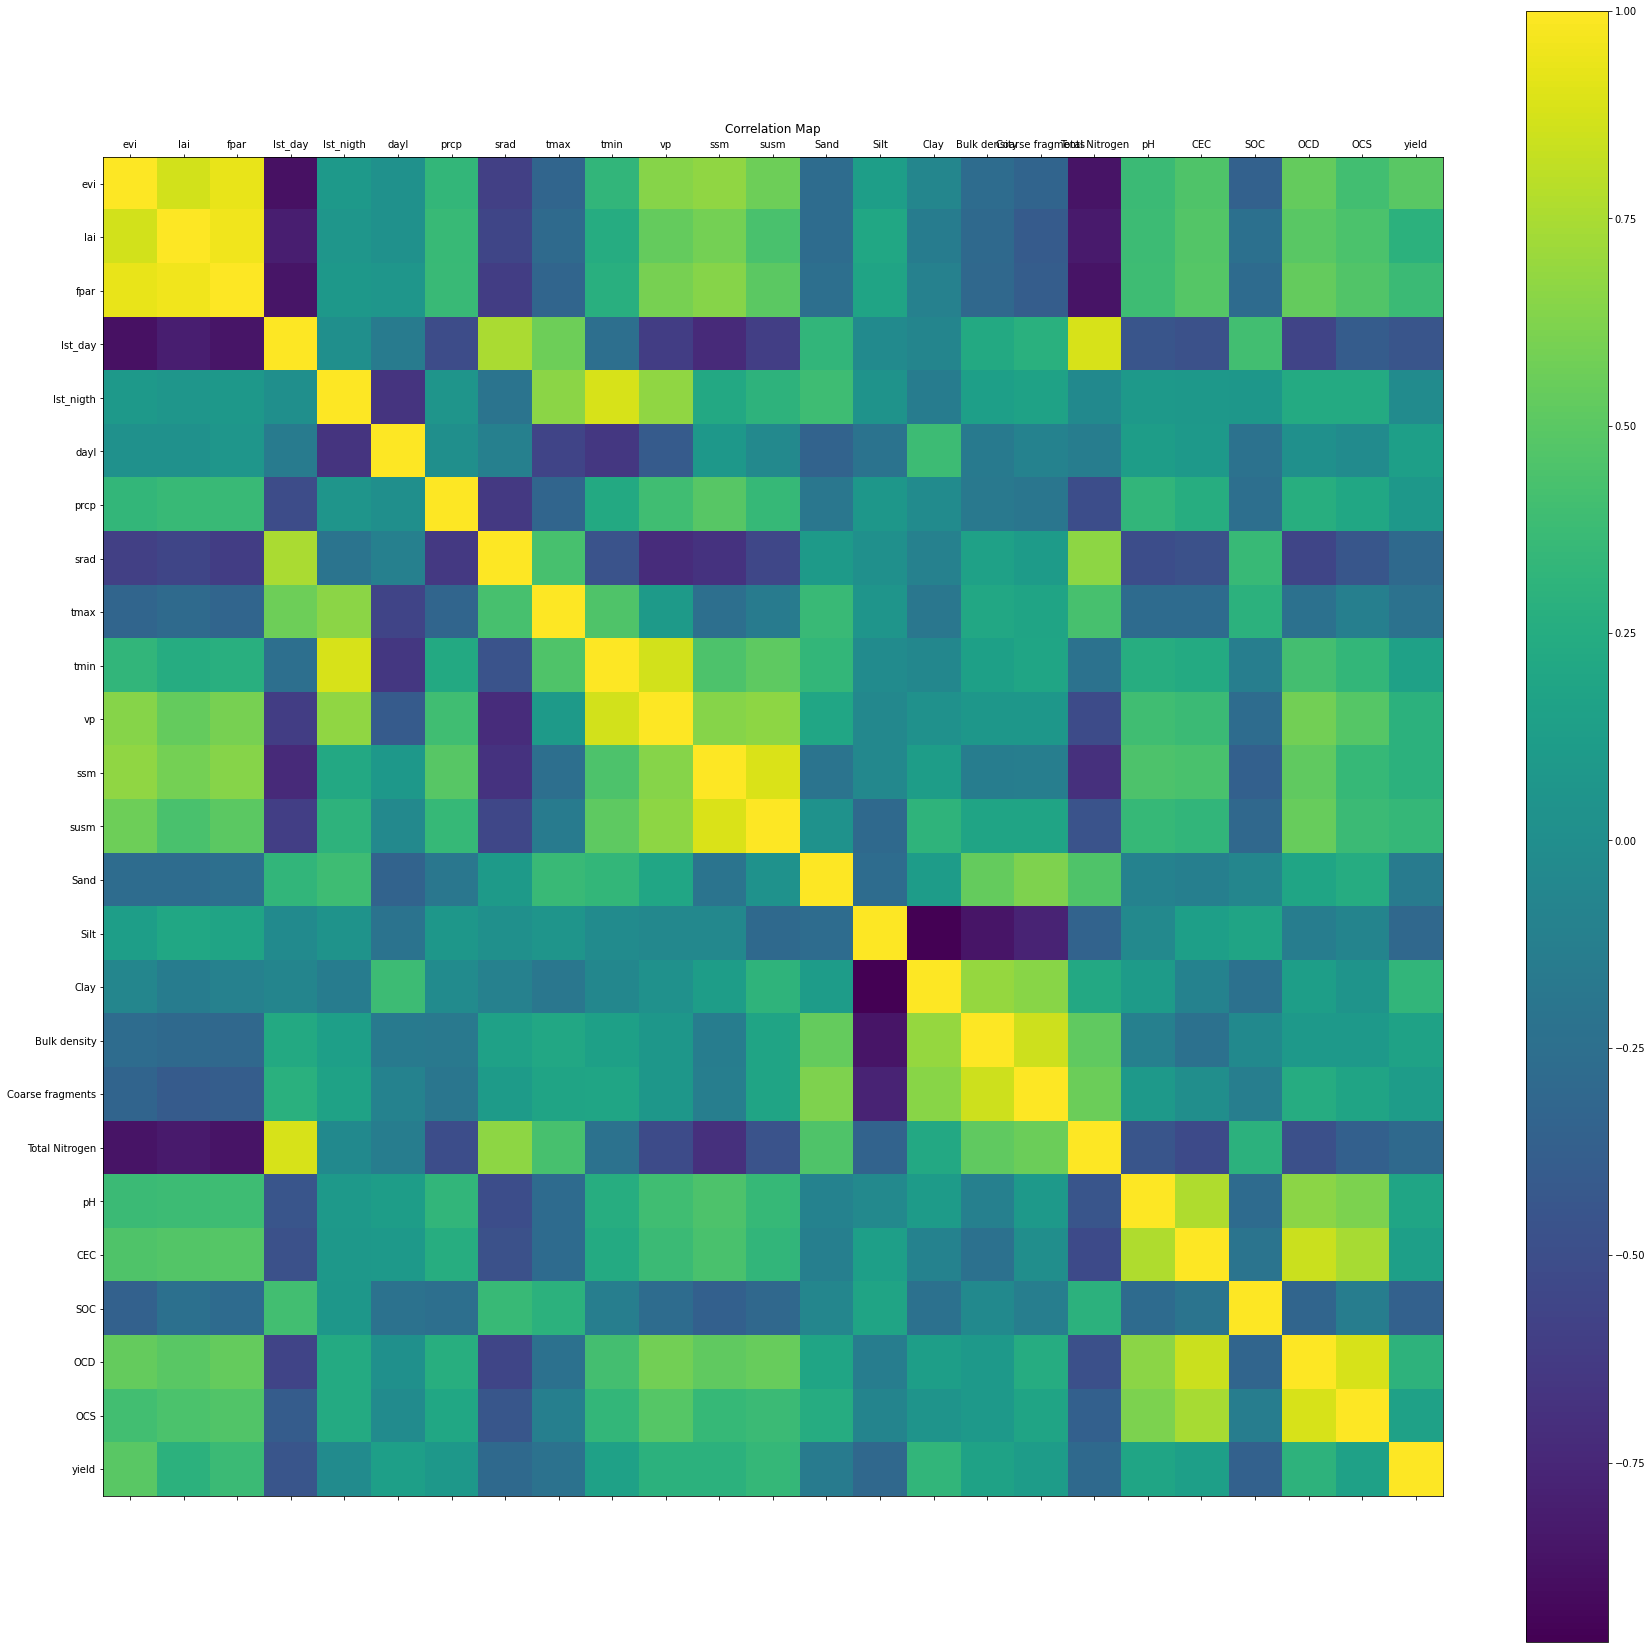

In [108]:
plt_corr(mean_df,size=(30,30),save_fig=True, save_path= "results/corr_map.png")

## XGBoost

In [84]:
import xgboost as xgb
from matplotlib import pyplot as plt

In [85]:
target = 'yield'

#df_no_data_removed_ = full_df.drop('Date',axis=1)


X = mean_df.drop(target,axis=1)

y = mean_df[target]

#  convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
data_dmatrix = xgb.DMatrix(data=X,label=y) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) 

# fit model no training data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror') 
xg_reg.fit(X_train,y_train) 
# plot feature importance


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

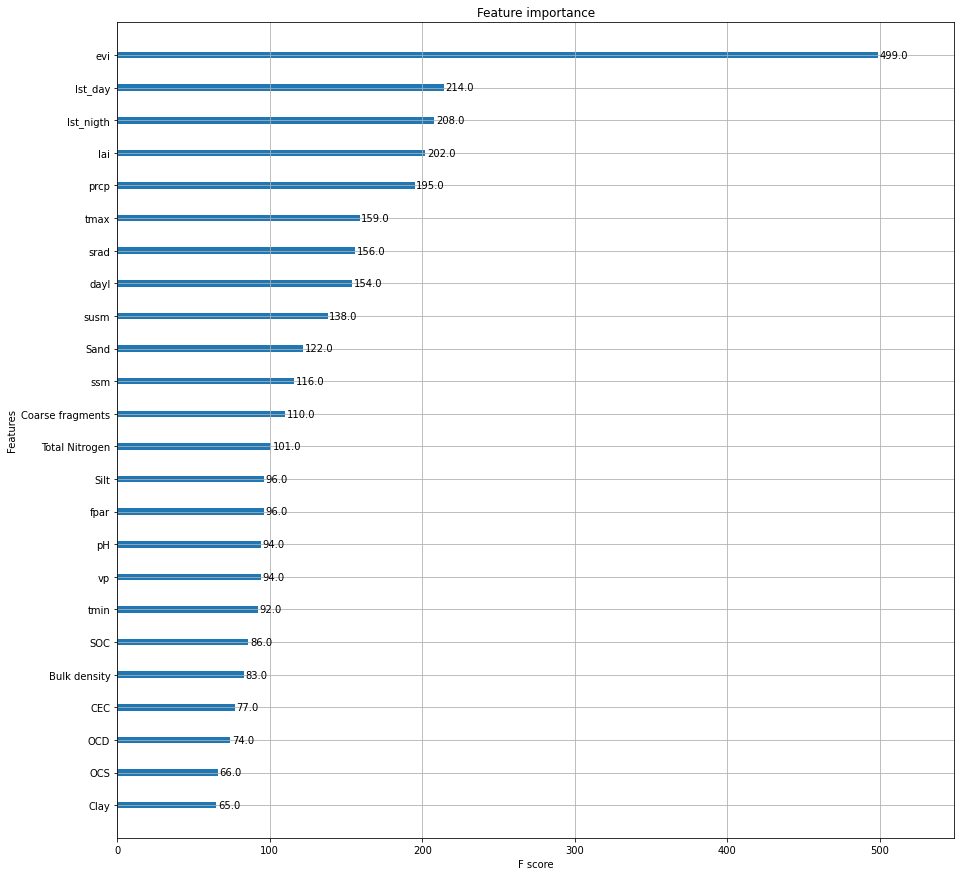

In [86]:
xgb.plot_importance(xg_reg) 
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

## SHAP

In [87]:
import shap

In [88]:
# Fits the explainer
explainer = shap.TreeExplainer(xg_reg)
# Calculates the SHAP values - It takes some time
_shap_values = explainer.shap_values(X_test)


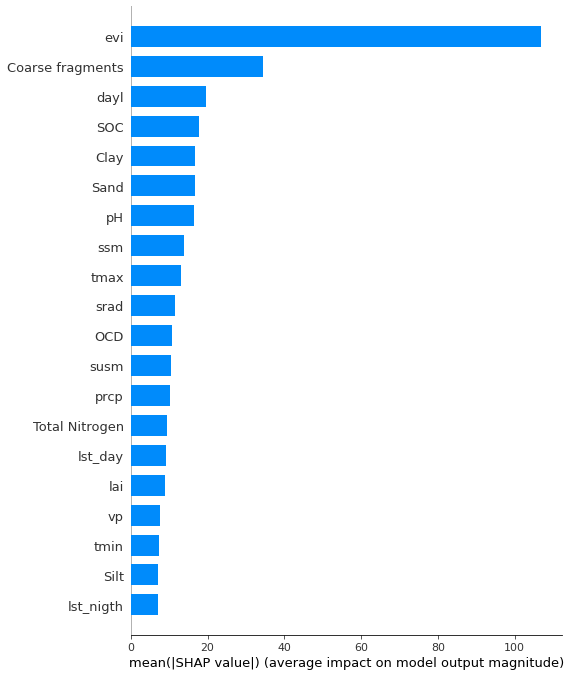

In [89]:
shap.summary_plot(_shap_values, X_test, plot_type="bar")


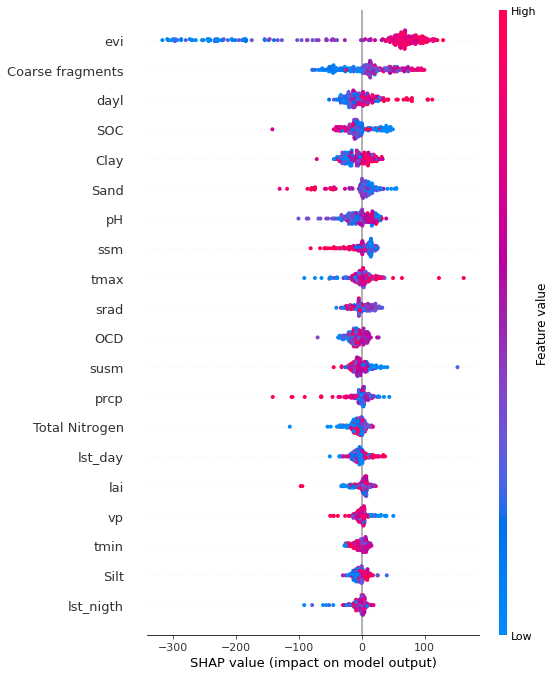

In [92]:
shap.summary_plot(_shap_values, X_test)

In [96]:
feature_names = X_train.columns
vals = np.abs(_shap_values).mean(0)


rf_resultX = pd.DataFrame(_shap_values, columns = X.columns)

vals = np.abs(rf_resultX).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head(25)

,col_name,feature_importance_vals
0,evi,106.876541
17,Coarse fragments,34.455246
5,dayl,19.469927
21,SOC,17.667404
15,Clay,16.810314
13,Sand,16.723413
19,pH,16.356535
11,ssm,13.823062
8,tmax,13.104445
7,srad,11.393207


## Feature Importance computed with Permutation method


In [97]:
from sklearn.inspection import permutation_importance

In [98]:
perm_importance = permutation_importance(xg_reg, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

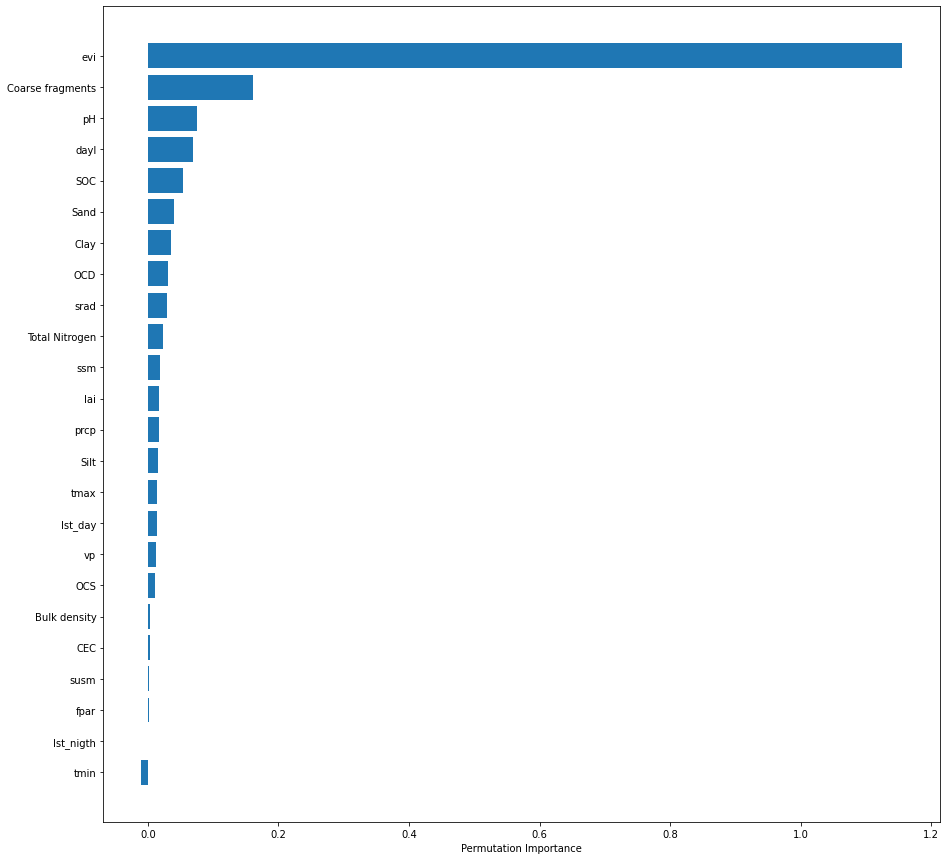

In [99]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(mean_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

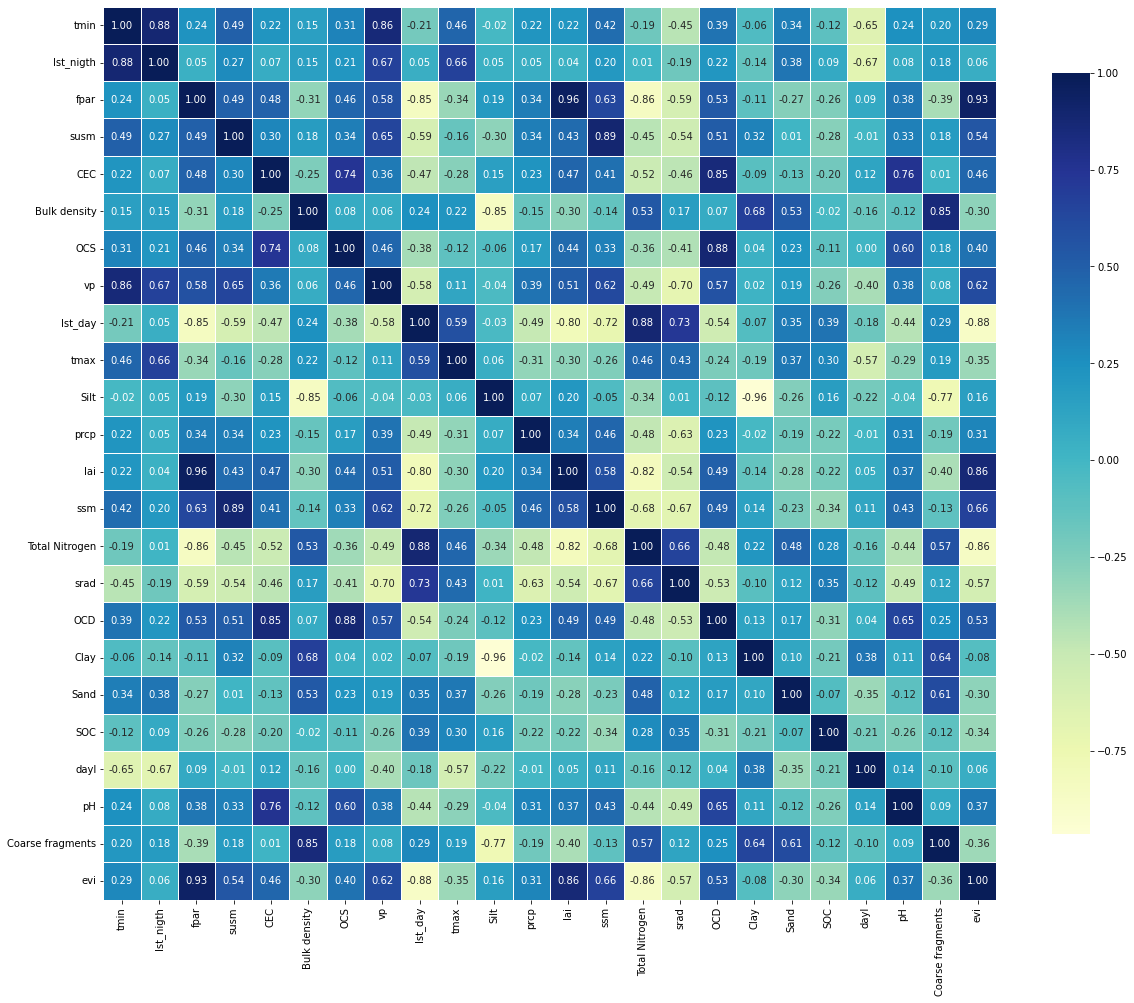

In [101]:
import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[mean_df.columns[sorted_idx]])